In [1]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

np.set_printoptions(suppress=True, precision=2)
from data_processing.Processor import load_detection_ds, Processor
from matplotlib import cm as mp_cm
import cv2
import tqdm
import json
import pandas as pd
from data_processing import image, bboxes
from utils.draw_bboxes import draw_bboxes
from models.fcos import build
from data_processing.io import load_gmc
from models.fcos.interpreter import Interpreter
from data_processing.nms import nms
from data_processing import io
from data_processing.BboxDetectionReport import BboxDetectionReport

In [2]:
raw_ds = load_detection_ds("training/val_dataset.yaml")

for sample in raw_ds:
    break

In [3]:
sample_size = (300,400) # Change if not the same

In [4]:
processor = Processor([
    image.LoadImage(),
    bboxes.LoadBboxes(n_bboxes=90),
    image.ResizeKeepRatio(sample_size[0],sample_size[1]),
    image.Normalize(),
    bboxes.BuildFCOSTarget(sample_size, [8])
], feature_keys=None)

In [9]:
interpreter = Interpreter('configs/interpreter.yaml')

bs=1
for sample in tqdm.tqdm_notebook(raw_ds.map(processor).batch(bs)):#raw_ds.shuffle(10).map(processor).batch(bs):
    bboxes_pred = interpreter(sample['target0'],  sample["src_img_bbox"].numpy(), sample["original_shape"].numpy())
    bboxes_pred = nms(bboxes_pred, 0.2)
    io.serialize(sample['img_path'].numpy(), bboxes_pred, 'data/images', 'data/logs/check_report')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [11]:
# Get default report

report = BboxDetectionReport()
report.from_serialized_report('data/images_markup', 'data/logs/check_report', class_idx = 0)
standard_report = report.run_standard_evaluation()
standard_report

{'precision_at_.3recall.5IoU': 0.831,
 'precision_at_.5recall.5IoU': 0,
 'precision_at_.8recall.5IoU': 0,
 'precision_at_.9recall.5IoU': 0,
 'recall_at_.3precision.5IoU': 0,
 'recall_at_.5precision.5IoU': 0.0,
 'recall_at_.8precision.5IoU': 0.069,
 'recall_at_.9precision.5IoU': 0}

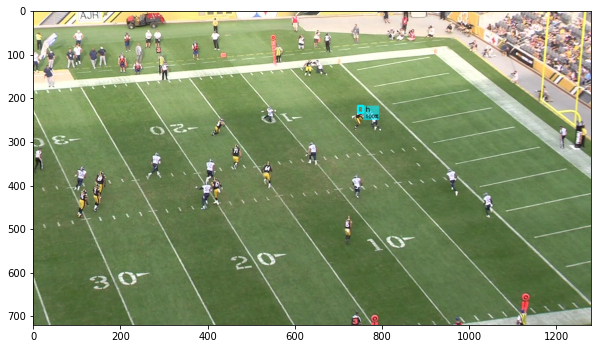

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(draw_bboxes(
    cv2.cvtColor(cv2.imread(sample['img_path'][0].numpy().decode('utf-8')), cv2.COLOR_BGR2RGB),
    bboxes_pred[0]))
plt.show()

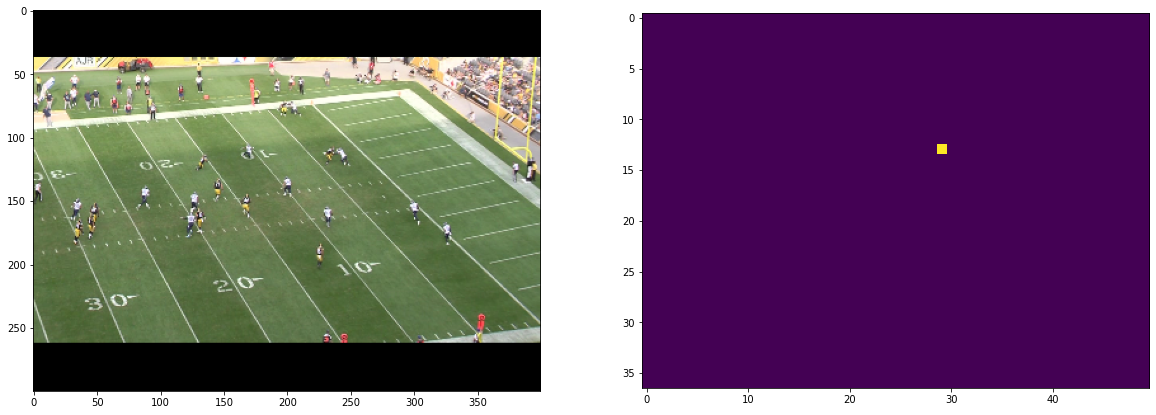

In [14]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(20,10))
ax[0].imshow(sample['img'].numpy()[0])
ax[1].imshow(sample['target0'].numpy()[0,:,:,0])
plt.show()

In [15]:
markup_path = sample['markup_path'].numpy()[0].decode('utf-8')
with open(markup_path, 'r') as fp:
    json_markup = json.load(fp)

In [16]:
json_markup['objects']

[{'data': [428, 246, 10, 8], 'tags': ['h', 'Helmet-Blurred'], 'type': 'rect'},
 {'data': [413, 380, 10, 11], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [143, 394, 10, 10], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [152, 365, 12, 11], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [108, 355, 12, 11], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [280, 323, 9, 9], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [403, 337, 10, 10], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [534, 343, 10, 11], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [462, 304, 10, 11], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [394, 391, 8, 8], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [634, 300, 8, 8], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [538, 217, 9, 9], 'tags': ['h', 'Helmet-Blurred'], 'type': 'rect'},
 {'data': [1032, 415, 12, 11], 'tags': ['h', 'Helmet'], 'type': 'rect'},
 {'data': [950, 362, 10, 8], 'tags': ['h', 'Helmet'], 't